# Preprocessing

## Data loading

In [1]:
import rasterio
import os
import numpy as np
import matplotlib.pyplot as plt

#normalisation function
normalise = lambda x : x / np.max(x)

# Dioni
# read
dioni = rasterio.open(os.path.join(os.pardir, 'data', 'HyRANK_satellite', 'TrainingSet', 'Dioni.tif')).read()
#normalise
dioni = np.array(list(map(normalise, [dioni[i, :, :] for i in range(dioni.shape[0])])))
# view shape
print(dioni.shape)

# Dioni GT
dioni_gt = rasterio.open(os.path.join(os.pardir, 'data', 'HyRANK_satellite', 'TrainingSet', 'Dioni_GT.tif')).read()
print(dioni_gt.shape)

# Loukia
loukia = rasterio.open(os.path.join(os.pardir, 'data', 'HyRANK_satellite', 'TrainingSet', 'Loukia.tif')).read()
loukia = np.array(list(map(normalise, [loukia[i, :, :] for i in range(loukia.shape[0])])))
print(loukia.shape)

# Loukia GT
loukia_gt = rasterio.open(os.path.join(os.pardir, 'data', 'HyRANK_satellite', 'TrainingSet', 'Loukia_GT.tif')).read()
print(loukia_gt.shape)

# Erato
erato = rasterio.open(os.path.join(os.pardir, 'data', 'HyRANK_satellite', 'TestSet', 'Erato.tif')).read()
erato = np.array(list(map(normalise, [erato[i, :, :] for i in range(erato.shape[0])])))
print(erato.shape)

#  Kirki
kirki = rasterio.open(os.path.join(os.pardir, 'data', 'HyRANK_satellite', 'TestSet', 'Kirki.tif')).read()
kirki = np.array(list(map(normalise, [kirki[i, :, :] for i in range(kirki.shape[0])])))
print(kirki.shape)

# Nefeli
nefeli = rasterio.open(os.path.join(os.pardir, 'data', 'HyRANK_satellite', 'TestSet', 'Nefeli.tif')).read()
nefeli = np.array(list(map(normalise, [nefeli[i, :, :] for i in range(nefeli.shape[0])])))
print(nefeli.shape)

C:\Users\spele\Miniconda3\envs\pytorch\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


(176, 250, 1376)
(1, 250, 1376)
(176, 249, 945)
(1, 249, 945)
(176, 241, 1632)
(176, 245, 1626)
(176, 249, 772)


## Image visualisation

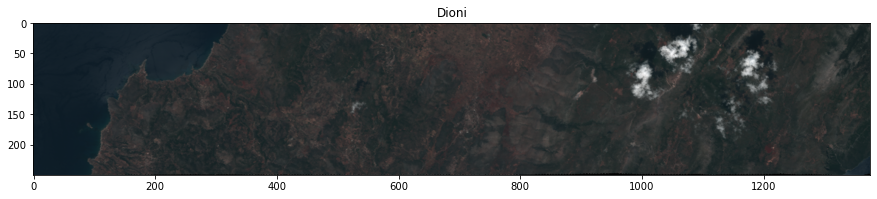

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
dioni_composite = dioni[[23, 11, 7], :, :]
plt.imshow(dioni_composite.transpose(1,2,0))
plt.title("Dioni")
plt.show()

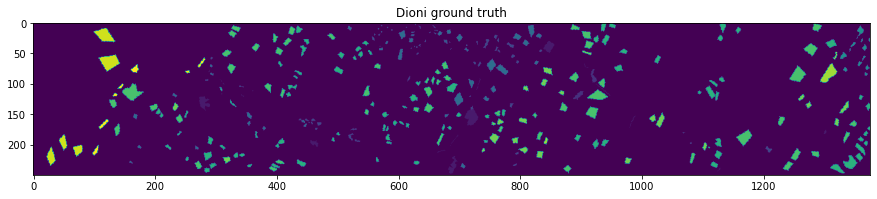

In [3]:
plt.imshow(dioni_gt.squeeze(0))
plt.title("Dioni ground truth")
plt.show()

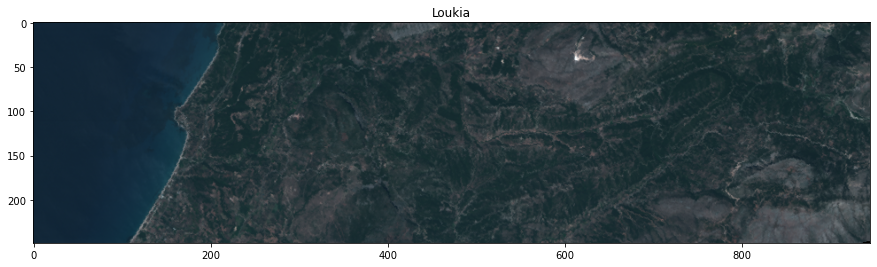

In [4]:
loukia_composite = loukia[[23, 11, 7], :, :]
plt.imshow(loukia_composite.transpose(1,2,0))
plt.title("Loukia")
plt.show()

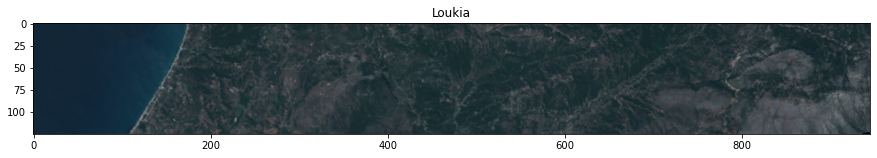

In [5]:
loukia_composite = loukia[:, loukia.shape[1]//2:, :][[23, 11, 7], :, :]
plt.imshow(loukia_composite.transpose(1,2,0))
plt.title("Loukia")
plt.show()

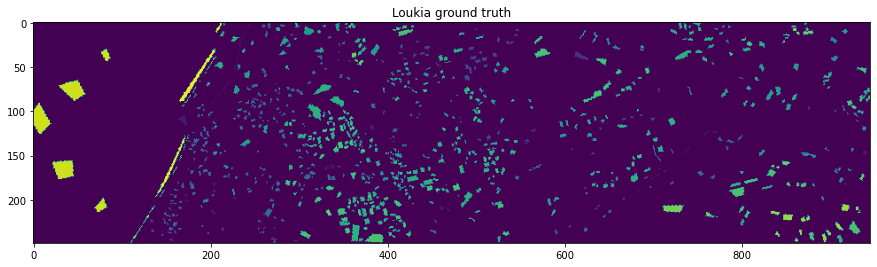

In [6]:
plt.imshow(loukia_gt.squeeze(0))
plt.title("Loukia ground truth")
plt.show()

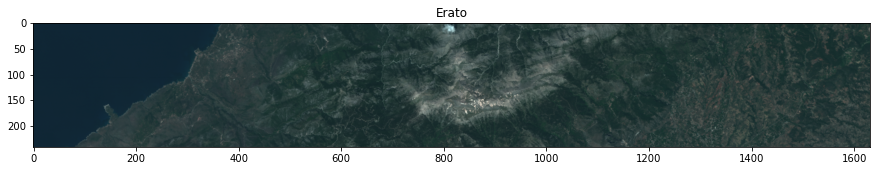

In [7]:
erato_composite = erato[[23, 11, 7], :, :]
plt.imshow(erato_composite.transpose(1,2,0))
plt.title("Erato")
plt.show()

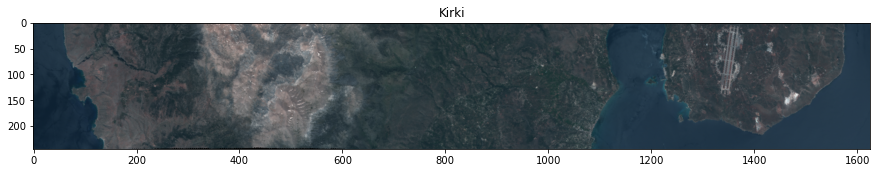

In [8]:
kirki_composite = kirki[[23, 11, 7], :, :]
plt.imshow(kirki_composite.transpose(1,2,0))
plt.title("Kirki")
plt.show()

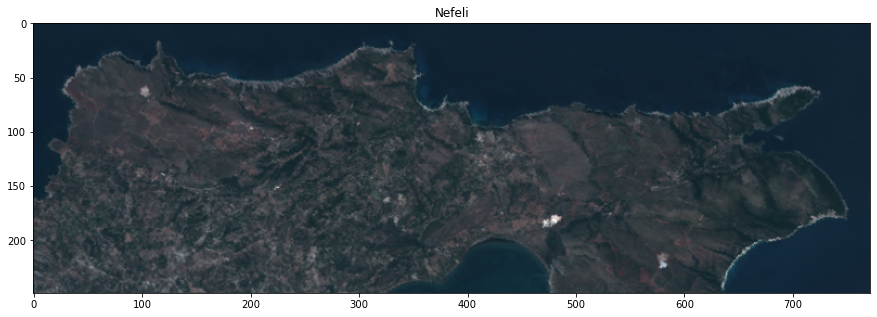

In [9]:
nefeli_composite = nefeli[[23, 11, 7], :, :]
plt.imshow(nefeli_composite.transpose(1,2,0))
plt.title("Nefeli")
plt.show()

## Class distributions

Loukia pixel distribution [221802    288     67    542     79   1401    223    500   1072   3793
   2803    404    487   1393    451]


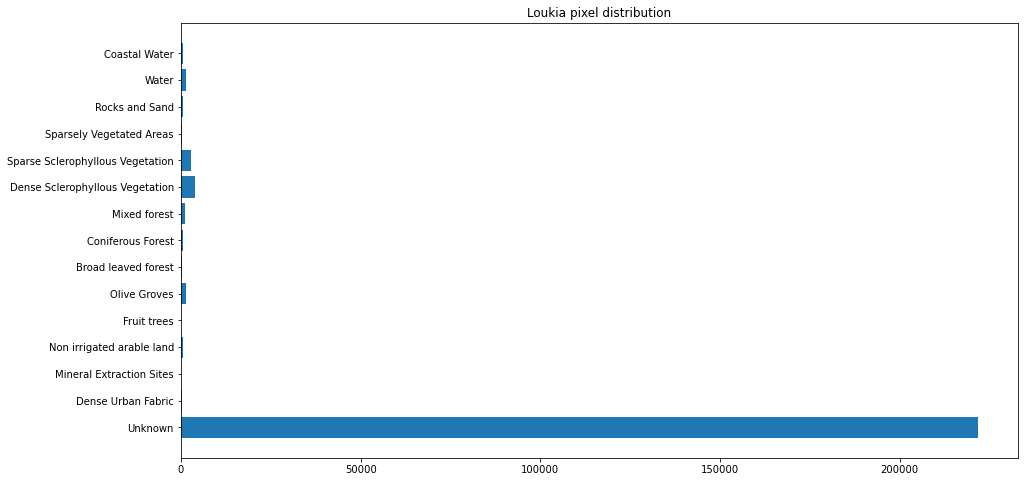

Dioni pixel distribution [323976   1262    204    614    150   1768      0    361      0   5035
   6374   1754    492   1612    398]


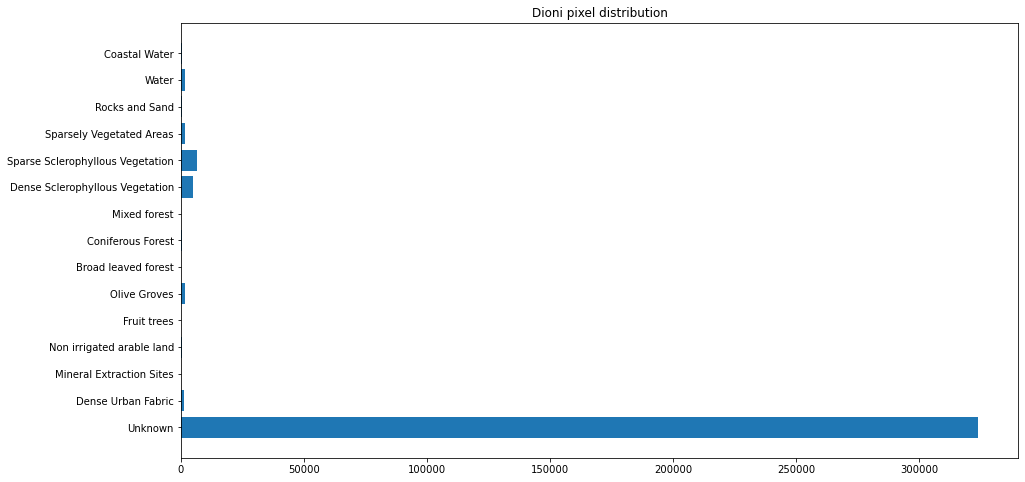

Dioni labeled pixel distribution [   0 1262  204  614  150 1768    0  361    0 5035 6374 1754  492 1612
  398]


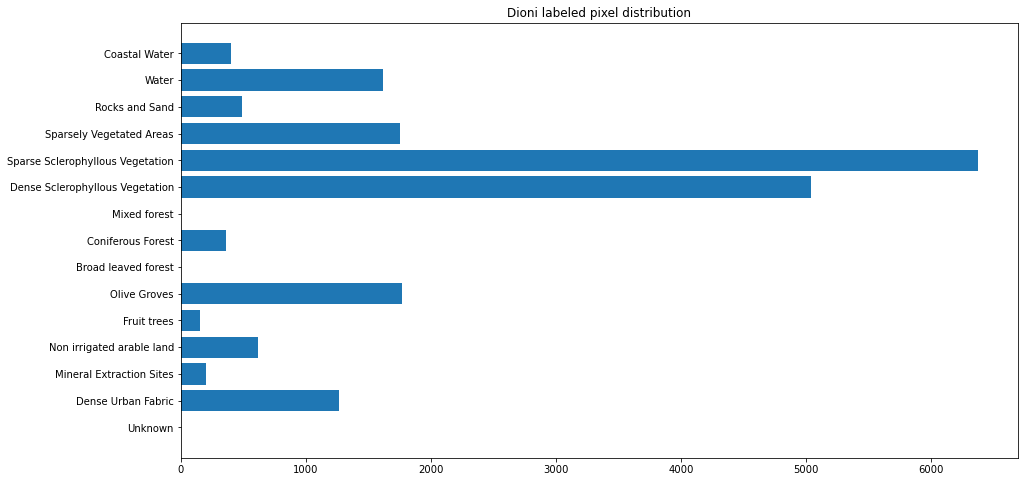

Loukia labeled pixel distribution [   0  288   67  542   79 1401  223  500 1072 3793 2803  404  487 1393
  451]


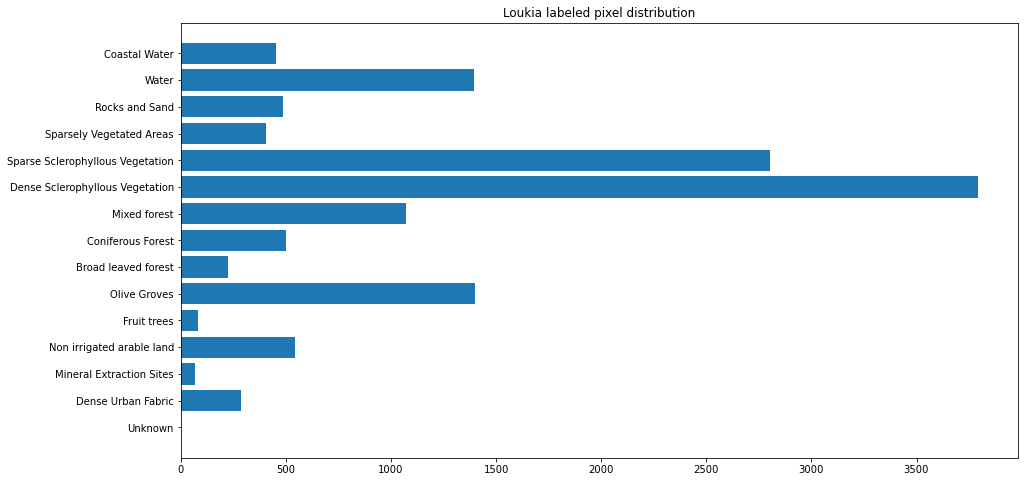

<module 'matplotlib.pyplot' from 'C:\\Users\\spele\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

In [10]:
import matplotlib.pyplot as plt
import json
import numpy as np
                  
def hist(y, title):
    fig, ax = plt.subplots()
    freqs = np.bincount(y)
    ticks = np.arange(len(freqs))
    print(title, freqs)
    ax.barh(ticks, freqs)
    labs = ["Unknown", "Dense Urban Fabric", "Mineral Extraction Sites", "Non irrigated arable land", "Fruit trees", 
            "Olive Groves", "Broad leaved forest", "Coniferous Forest", "Mixed forest", 
            "Dense Sclerophyllous Vegetation", "Sparse Sclerophyllous Vegetation", "Sparsely Vegetated Areas", 
            "Rocks and Sand", "Water", "Coastal Water"]
    ax.set_yticks(np.arange(len(ticks)))
    ax.set_yticklabels(labs)
    #plt.xticks(ticks=np.arange(len(ticks)), labels=labs, rotation=90)
    ax.set_title(title)
    #plt.title(title)
    plt.show()
    return plt


hist(loukia_gt.reshape(-1), "Loukia pixel distribution")
hist(dioni_gt.reshape(-1), "Dioni pixel distribution")

hist(dioni_gt[dioni_gt != 0].reshape(-1), "Dioni labeled pixel distribution")
hist(loukia_gt[loukia_gt != 0].reshape(-1), "Loukia labeled pixel distribution")

# Data preparation for baseline pixel based classification - Train / Test split
The split here is set in the same manner as in the neural network section so as to have a common baseline. It is essential to set exclusive subsets of each image to functions as banks of train / test / validation pixels so that pixels from the same labeled patches do not exist both in train and test sets because this would be like "cheating" given the fact that close pixels are very similar to each other. Following this method an accuracy of 95% on the test set was achieved when the SVM was tuned based on random CV splits of shuffled splits from both images. However this was not considered as a meaningful prediction given that such a split rendered the problem much easier without actually depicting the real difficulty of the dataset.

In [11]:
import os 
import numpy as np

train = [dioni[:, dioni.shape[1]//8:, :], 
         loukia[:, loukia.shape[1]//4:, :]]

test = [dioni[:, :dioni.shape[1]//8, :], 
        loukia[:, :loukia.shape[1]//8, :]]

train_gt = [dioni_gt[:, dioni_gt.shape[1]//8:, :], 
            loukia_gt[:, loukia_gt.shape[1]//4:, :]]


test_gt = [dioni_gt[:, :dioni_gt.shape[1]//8, :], 
           loukia_gt[:, :loukia_gt.shape[1]//8, :]]

### Train / Test Visualisation

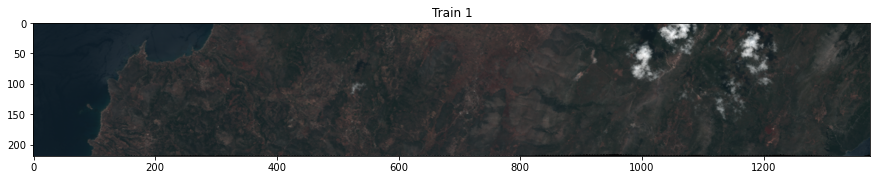

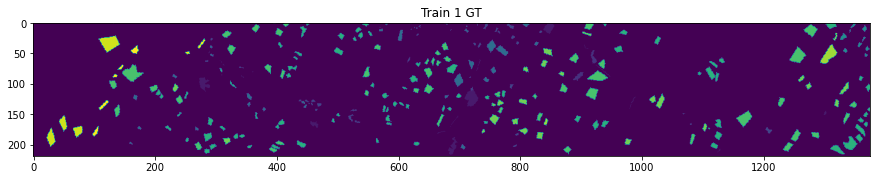

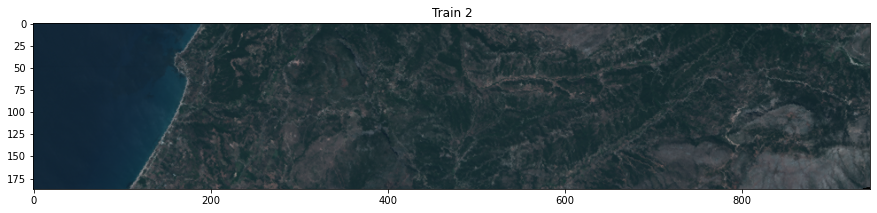

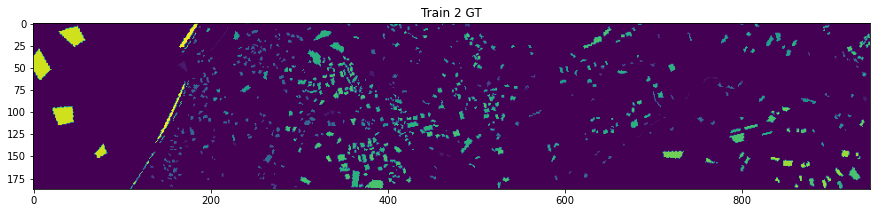

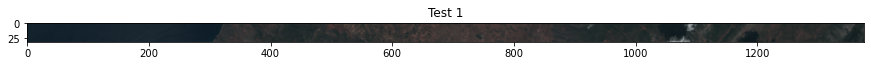

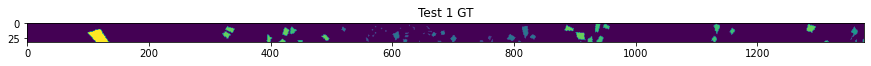

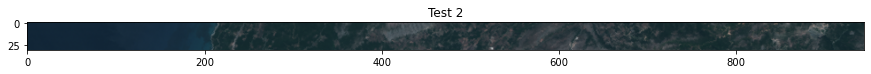

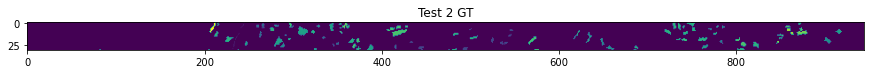

In [12]:
dioni_composite = train[0][[23, 11, 7], :, :]
plt.imshow(dioni_composite.transpose(1,2,0))
plt.title("Train 1")
plt.show()

dioni_composite = train_gt[0][:, :, :].squeeze(0)
plt.imshow(dioni_composite)
plt.title("Train 1 GT")
plt.show()

dioni_composite = train[1][[23, 11, 7], :, :]
plt.imshow(dioni_composite.transpose(1,2,0))
plt.title("Train 2")
plt.show()

dioni_composite = train_gt[1][:, :, :].squeeze(0)
plt.imshow(dioni_composite)
plt.title("Train 2 GT")
plt.show()

dioni_composite = test[0][[23, 11, 7], :, :]
plt.imshow(dioni_composite.transpose(1,2,0))
plt.title("Test 1")
plt.show()

dioni_composite = test_gt[0][:, :, :].squeeze(0)
plt.imshow(dioni_composite)
plt.title("Test 1 GT")
plt.show()

dioni_composite = test[1][[23, 11, 7], :, :]
plt.imshow(dioni_composite.transpose(1,2,0))
plt.title("Test 2")
plt.show()

dioni_composite = test_gt[1][:, :, :].squeeze(0)
plt.imshow(dioni_composite)
plt.title("Test 2 GT")
plt.show()

## Old split
# X1 = dioni.transpose(1, 2, 0)
# print("Initial shape: ", X1.shape)
# X1 = X1.reshape(-1, X1.shape[2])
# # X
# print("X")
# X1 = dioni.transpose(1, 2, 0)
# print("Initial shape: ", X1.shape)
# X1 = X1.reshape(-1, X1.shape[2])
# print("Final shape: ", X1.shape)

# X2 = loukia.transpose(1, 2, 0)
# print("Initial shape: ", X2.shape)
# X2 = X2.reshape(-1, X2.shape[2])
# print("Final shape: ", X2.shape)

# X = np.concatenate([X1, X2])
# print("Final X shape: ", X.shape)

# # y
# print("Y")
# print("Initial shape: ", dioni_gt.shape)
# y1 = dioni_gt.reshape(-1)
# print("Final shape: ", y1.shape)

# print("Initial shape: ", loukia_gt.shape)
# y2 = loukia_gt.reshape(-1)
# print("Final shape: ", y2.shape)

# y = np.concatenate([y1, y2])
# print("Final y shape: ", y.shape)

### Pixel based train / val / test
Train1 and Train2 images pixels are concatenated inside a single pixel based training dataset along with their corresponding labels.
Test1 and Test2 images pixels are concatenated inside a single pixel based testing dataset along with their corresponding labels.
The validation set creation was omitted here given that a gridsearch approch was followed in order to tune the SVM which automatically applies train / validation splitting to the existing pixel-based training set.

In [13]:
dioni_train_pixels = train[0].transpose(1, 2, 0).reshape(-1, train[0].shape[0])
loukia_train_pixels = train[1].transpose(1, 2, 0).reshape(-1, train[0].shape[0])

X_train = np.concatenate([dioni_train_pixels, loukia_train_pixels])

dioni_train_pixels_gt = train_gt[0].transpose(1, 2, 0).reshape(-1, train_gt[0].shape[0])
loukia_train_pixels_gt = train_gt[1].transpose(1, 2, 0).reshape(-1, train_gt[0].shape[0])

y_train = np.concatenate([dioni_train_pixels_gt, loukia_train_pixels_gt]).reshape(-1)

dioni_test_pixels = test[0].transpose(1, 2, 0).reshape(-1, test[0].shape[0])
loukia_test_pixels = test[1].transpose(1, 2, 0).reshape(-1, test[0].shape[0])

X_test = np.concatenate([dioni_test_pixels, loukia_test_pixels])

dioni_test_pixels_gt = test_gt[0].transpose(1, 2, 0).reshape(-1, test_gt[0].shape[0])
loukia_test_pixels_gt = test_gt[1].transpose(1, 2, 0).reshape(-1, test_gt[0].shape[0])

y_test = np.concatenate([dioni_test_pixels_gt, loukia_test_pixels_gt]).reshape(-1)

print(X_test.shape, y_test.shape)

(71951, 176) (71951,)


## Data cleaning 

Non labeled pixels are removed from the training and test sets.

In [14]:
# X = X[y!=0]
# y = y[y!=0]
# y=y-1
X_train = X_train[y_train!=0]
y_train = y_train[y_train!=0]
y_train=y_train-1

print("Final shapes: ", X_train.shape, y_train.shape)
print("Classes: ", np.unique(y_train))

# X_val = X_val[y_val!=0]
# y_val = y_val[y_val!=0]
# y_val=y_val-1

# print("Final shapes: ", X_val.shape, y_val.shape)
# print("Classes: ", np.unique(y_val))

X_test = X_test[y_test!=0]
y_test = y_test[y_test!=0]
y_test=y_test-1

print("Final shapes: ", X_test.shape, y_test.shape)
print("Classes: ", np.unique(y_test))

Final shapes:  (28075, 176) (28075,)
Classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Final shapes:  (3880, 176) (3880,)
Classes:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]


In [15]:
# from sklearn.model_selection import train_test_split
# # Split to training and test set
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=69, stratify=y)

## SVM training for pixel classification - Baseline model

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import StratifiedKFold

### Gridsearch 
Gridsearch is applied. Validation set is merged with training set as the algorithm uses Cross Validation so different inner splits are created.

In [17]:
#Set the parameters of each model by cross-validation gridsearch
models = {'SVM': SVC()}

param_grid = [{'kernel': ['rbf'], 'C': [1, 100, 1000]}]

best_scores=[]
params=[]
# Below I locate the best svm classifiers for each kernel and the best knn classifier and compute their score 
# on the test set 
for (a, tp, name) in list(zip(models.values(), param_grid, models.keys())):
    print("\n\nTuning hyper-parameters, based on accuracy for {} with parameter grid:\n {}\n"
          .format(name, tp))
    clf = GridSearchCV(a, tp, cv = StratifiedKFold(5) , scoring = 'accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    print("Mean performance of each parameter combination based on Cross Validation")
    performance = pd.DataFrame(clf.cv_results_['params'])
    performance["Score"] = clf.cv_results_['mean_test_score']
    print(performance)
    print("\nBest parameters set found on training set:")
    print(clf.best_params_)
    params.append(clf.best_params_)
    print("\nThe scores are computed on the full evaluation set:")
    #evaluate and store scores of estimators of each category on validation set
    score = clf.score(X_test, y_test)
    print("Accuracy:", score)
    best_scores.append(score)
final_scores = dict(zip(list(models.keys()), best_scores))
print("\n\nThe best accuracies achieved by the algorithms are:", final_scores)



Tuning hyper-parameters, based on accuracy for SVM with parameter grid:
 {'kernel': ['rbf'], 'C': [1, 100, 1000]}

Mean performance of each parameter combination based on Cross Validation
      C kernel     Score
0     1    rbf  0.782725
1   100    rbf  0.792413
2  1000    rbf  0.759074

Best parameters set found on training set:
{'C': 100, 'kernel': 'rbf'}

The scores are computed on the full evaluation set:
Accuracy: 0.8002577319587629


The best accuracies achieved by the algorithms are: {'SVM': 0.8002577319587629}


### Fit best SVM model on all training data and create inference mapping

In [ ]:
# clf = SVC(kernel="rbf", C=1e4)
# clf.fit(X_train, y_train)
# score = clf.score(X_val, y_val)
# print("Accuracy on validation set:", score)
clf = SVC(kernel="rbf", C=100)
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])
clf.fit(X, y)

### Classification function definition

In [17]:
classify = lambda x:clf.predict(x)

### Inference and visualisations for the best SVM model

Erato

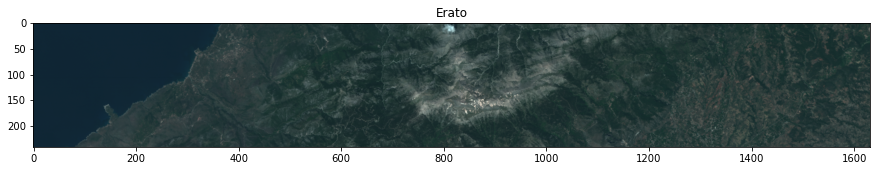

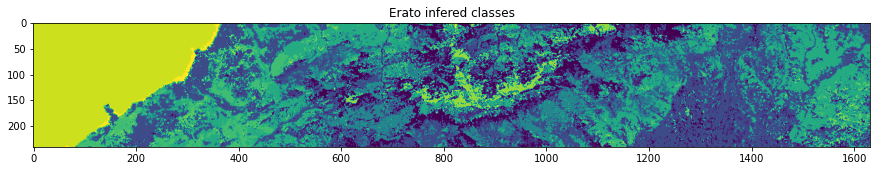

In [18]:
width = erato.shape[1]
height = erato.shape[2]
erato_inference = classify(erato.transpose(1,2,0).reshape((width*height, -1))).reshape((width, height))
plt.imshow(erato_composite.transpose(1,2,0))
plt.title("Erato")
plt.show()
plt.imshow(erato_inference)
plt.title("Erato infered classes")
plt.legend
plt.show()

Nefeli

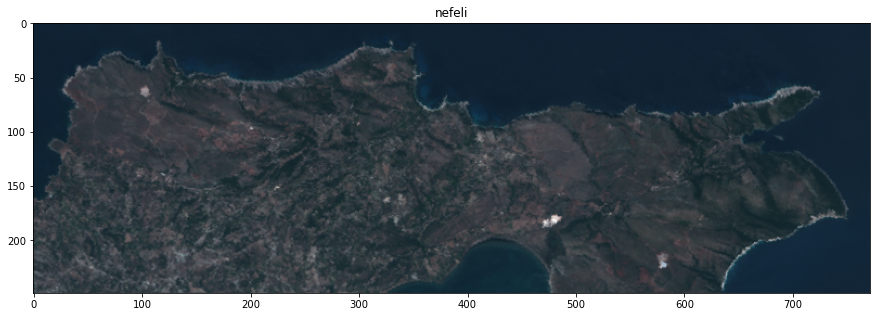

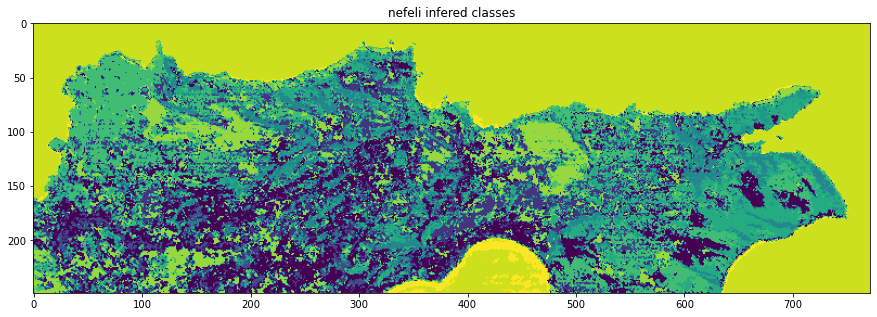

In [19]:
width = nefeli.shape[1]
height =nefeli.shape[2]
nefeli_inference = classify(nefeli.transpose(1,2,0).reshape((width*height, -1))).reshape((width, height))
plt.imshow(nefeli_composite.transpose(1,2,0))
plt.title("nefeli")
plt.show()
plt.imshow(nefeli_inference)
plt.title("nefeli infered classes")
plt.show()

Kirki

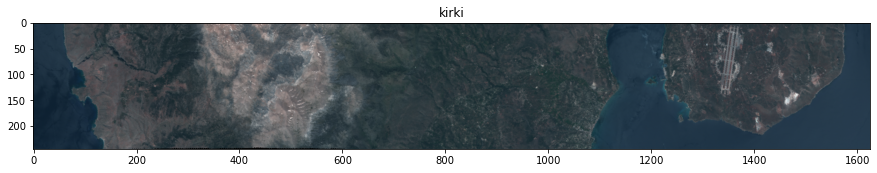

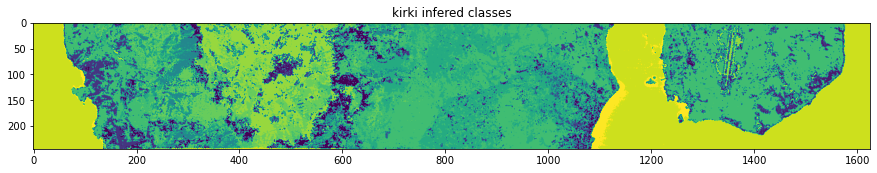

In [20]:
width = kirki.shape[1]
height =kirki.shape[2]
kirki_inference = classify(kirki.transpose(1,2,0).reshape((width*height, -1))).reshape((width, height))
plt.imshow(kirki_composite.transpose(1,2,0))
plt.title("kirki")
plt.show()
plt.imshow(kirki_inference)
plt.title("kirki infered classes")
plt.show()